<a href="https://colab.research.google.com/github/Denismwangi01/Exploratory-Data-Analysis/blob/main/EDA_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Word Cloud in Python

In [1]:
pip install wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import kagglehub
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2


In [4]:
#dowloading the data
import os

dataset_path = "/root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2"
files = os.listdir(dataset_path)

print("Available files:", files)


Available files: ['twitter_validation.csv', 'twitter_training.csv']


In [5]:
#loading the data
file_path =(dataset_path + "/twitter_training.csv")
df = pd.read_csv(file_path)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
#assign columns
columns = ['ID','Entity','sentiment','Tweet']
df= pd.read_csv(file_path, names=columns)
df.head()

,ID,Entity,sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Data Exploration

In [7]:
#shape of the data
df.shape

(74682, 4)

In [8]:
df.isnull().sum()

,0
ID,0
Entity,0
sentiment,0
Tweet,686


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Data Cleaning

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (df['Tweet'].isnull().sum()/len(df)*100)
print(f'{missing_percentage:.2f}%')

0.92%


we found  that Tweet column was having a missing value of 0.92% which very low and so we drop it

In [12]:
# Removing the missing values
df = df.dropna(subset=['Tweet'])
df.shape

(73996, 4)

In [13]:
df.isnull().sum()

,0
ID,0
Entity,0
sentiment,0
Tweet,0


In [20]:
import re
def clean_tweet(text):
  text = text.lower()
  text = re.sub(r'[^a-z0-9\s]','', text)
  text = re.sub(r'\s+',' ',text).strip()
  return text

df['clean_tweet']= df['Tweet'].apply(clean_tweet)
df[['Tweet', 'clean_tweet']].head()

,Tweet,clean_tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


# Exploratory Data Analysis

In [24]:
sentiment_counts= df['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


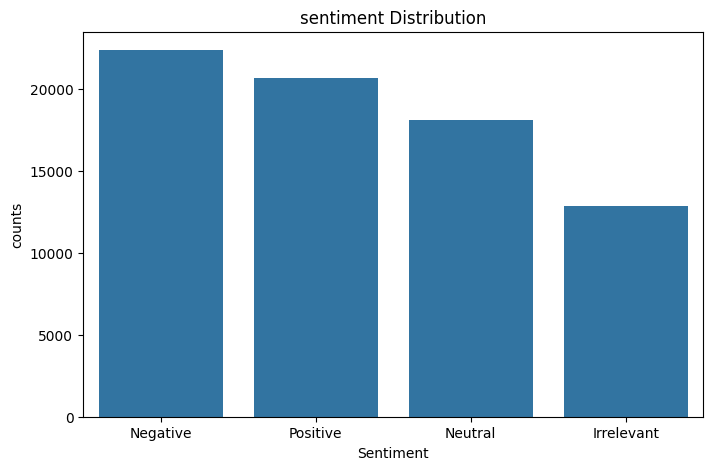

In [26]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('counts')
plt.show()


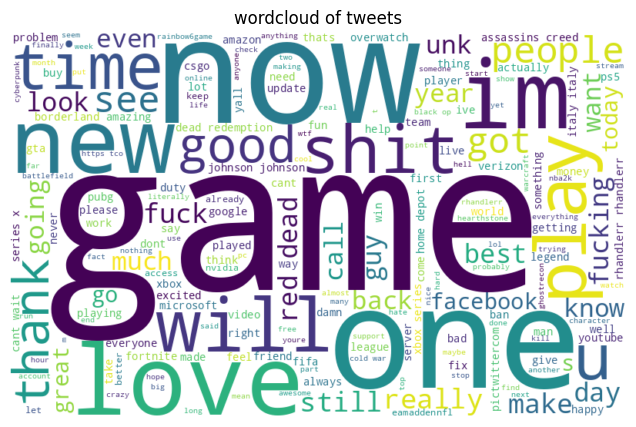

In [27]:
all_tweets = " ".join(df['clean_tweet'])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud of tweets')
plt.show()
